--------------------------------------------------------------------------------------------------------------------------------------<h1>Level 2</h1>--------------------------------------------------------------------------------------------------------------------------------------

_________<h2>Task 1 : Table Booking and Online Delivery</h2>_________

In [109]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings('ignore')

In [110]:
# reading dataset

retail=pd.read_csv('Dataset .csv')
retail

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [111]:
# Calculate the percentage of restaurants that offer table booking
table_booking_counts = retail['Has Table booking'].value_counts(normalize=True) * 100
print("Percentage of Restaurants Offering Table Booking:")
print(table_booking_counts)

# Calculate the percentage of restaurants that offer online delivery
online_delivery_counts = retail['Has Online delivery'].value_counts(normalize=True) * 100
print("Percentage of Restaurants Offering Online Delivery:")
print(online_delivery_counts)

Percentage of Restaurants Offering Table Booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64
Percentage of Restaurants Offering Online Delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


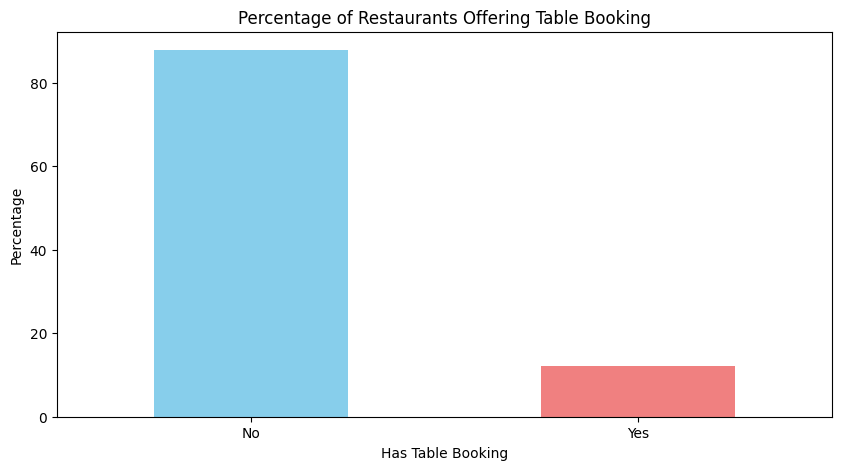

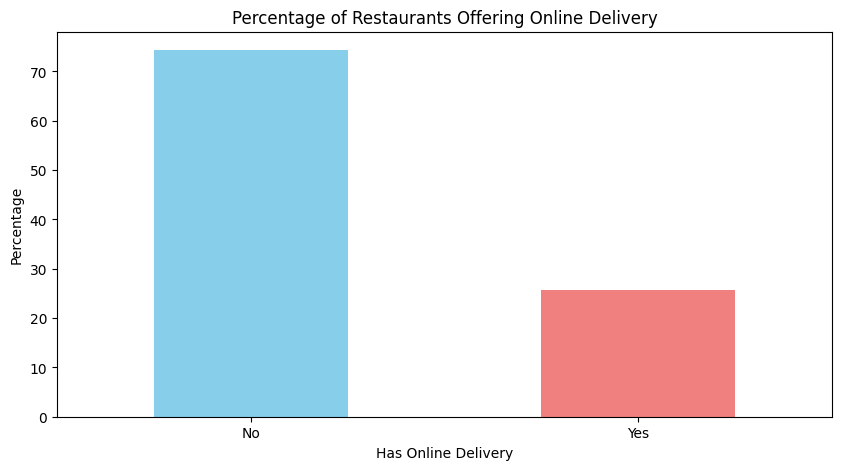

In [112]:
# Visualize the results for table booking
plt.figure(figsize=(10, 5))
table_booking_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Percentage of Restaurants Offering Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

# Visualize the results for online delivery
plt.figure(figsize=(10, 5))
online_delivery_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Percentage of Restaurants Offering Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

In [113]:
# Group by 'Has Table booking' and calculate the mean of 'Aggregate rating'
mean_ratings = retail.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()


In [114]:
# Print the mean ratings for each group
print("Average Ratings Based on Table Booking Availability:")
print(mean_ratings)

Average Ratings Based on Table Booking Availability:
  Has Table booking  Aggregate rating
0                No          2.559359
1               Yes          3.441969


From the data, it is evident that restaurants offering table booking have a higher average rating (3.442) compared to those that do not offer table booking (2.559). This suggests that restaurants with table booking services tend to receive better ratings from customers.

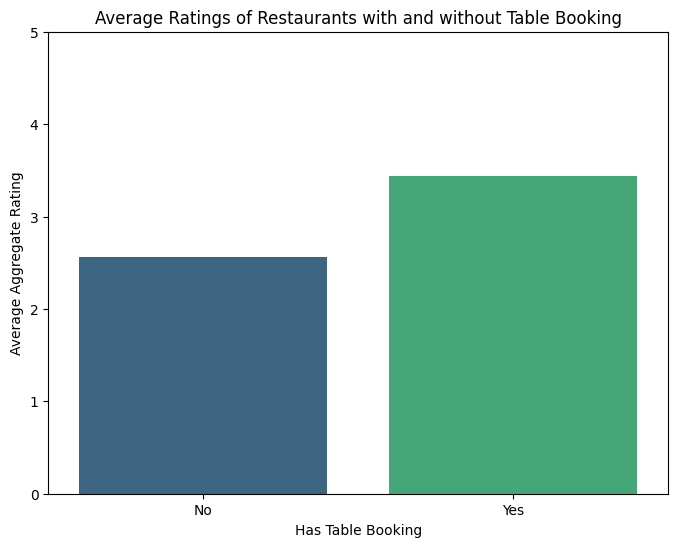

In [115]:
# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Has Table booking', y='Aggregate rating', data=mean_ratings, palette='viridis')
plt.title('Average Ratings of Restaurants with and without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Aggregate Rating')
plt.ylim(0, 5)
plt.show()

In [116]:
# Group by 'Price range' and 'Has Online delivery', then calculate the count
online_delivery_by_price_range = retail.groupby(['Price range', 'Has Online delivery']).size().unstack().fillna(0)


In [117]:
# Calculate the percentage of restaurants offering online delivery within each price range
online_delivery_percentage = online_delivery_by_price_range.div(online_delivery_by_price_range.sum(axis=1), axis=0) * 100

# Print the results
print("Availability of Online Delivery by Price Range:")
print(online_delivery_percentage)

Availability of Online Delivery by Price Range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


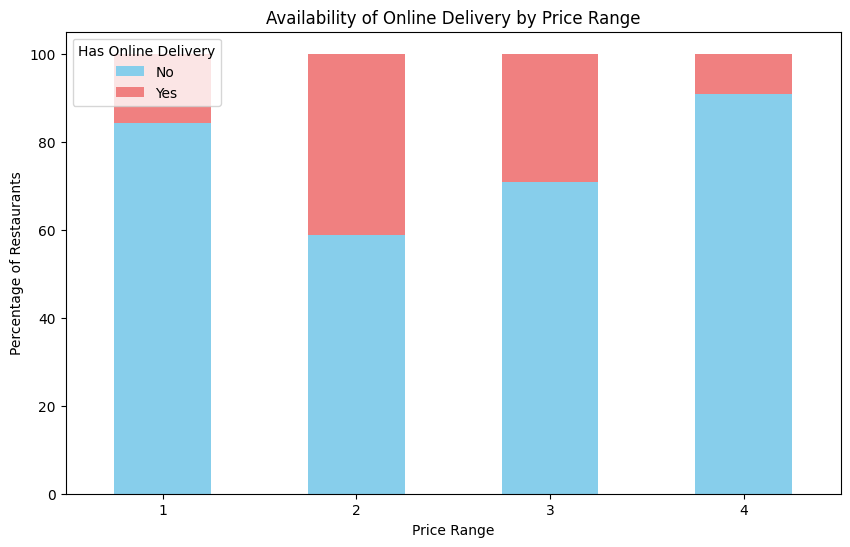

In [118]:
# Visualize the results
plt.figure(figsize=(10, 6))
online_delivery_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], ax=plt.gca())
plt.title('Availability of Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.legend(title='Has Online Delivery')
plt.xticks(rotation=0)
plt.show()

_________<h2>Task 2 : Price Range Analysis</h2>_________

In [119]:
# Count the occurrences of each price range
price_range_counts = retail['Price range'].value_counts()


In [120]:
# Determine the most common price range
most_common_price_range = price_range_counts.idxmax()


In [121]:
# Print the most common price range
print("The most common price range among all the restaurants is:", most_common_price_range)

The most common price range among all the restaurants is: 1


In [122]:
# Group by 'Price range' and calculate the mean of 'Aggregate rating'
average_rating_by_price_range = retail.groupby('Price range')['Aggregate rating'].mean()


In [123]:

# Display the results
print("Average Rating for Each Price Range:")
print(average_rating_by_price_range)

Average Rating for Each Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


These ratings indicate that as price range increases, so does the average rating, suggesting higher customer satisfaction in more expensive restaurants.







In [124]:
# Map average ratings to corresponding rating colors
average_rating_colors = retail.groupby('Price range')['Rating color'].first()

# Identify the color with the highest average rating
highest_rating_color = average_rating_colors[average_rating_by_price_range.idxmax()]

# Print the result
print("Color representing the highest average rating among different price ranges:", highest_rating_color)

Color representing the highest average rating among different price ranges: Green


_________<h2>Task 3 : Feature Engineering</h2>_________

In [125]:
# Extracting length of Restaurant Name and Address
retail['Restaurant Name Length'] = retail['Restaurant Name'].str.len()
retail['Address Length'] = retail['Address'].str.len()


In [126]:
# Display the updated DataFrame with new features
print(retail[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head())

          Restaurant Name  Restaurant Name Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


In [127]:
# Convert categorical variables to binary features
retail['Has Table Booking Binary'] = (retail['Has Table booking'] == 'Yes').astype(int)
retail['Has Online Delivery Binary'] = (retail['Has Online delivery'] == 'Yes').astype(int)


In [128]:
# Display the updated DataFrame with new binary features
print(retail[['Has Table booking', 'Has Table Booking Binary', 'Has Online delivery', 'Has Online Delivery Binary']].head())

  Has Table booking  Has Table Booking Binary Has Online delivery  \
0               Yes                         1                  No   
1               Yes                         1                  No   
2               Yes                         1                  No   
3                No                         0                  No   
4               Yes                         1                  No   

   Has Online Delivery Binary  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  


In [129]:
retail

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking Binary,Has Online Delivery Binary
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,3,4.1,Green,Very Good,788,11,103,0,0
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,3,4.2,Green,Very Good,1034,12,77,0,0
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,4,3.7,Yellow,Good,661,5,73,0,0
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,4,4.0,Green,Very Good,901,11,75,0,0
